**RGB to BGR**

In [15]:
from google.colab import files
uploaded = files.upload()

Saving rgb.jpeg to rgb.jpeg


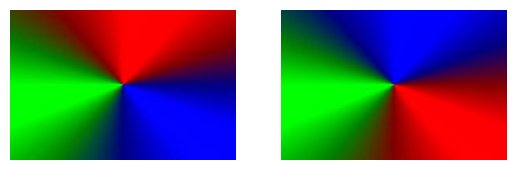

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
#without using built in function bgrtorgb
bgr_image = cv2.imread("rgb.jpeg")
B,G,R=cv2.split(bgr_image)
rgb_image = cv2.merge([R,G,B])

plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(bgr_image)
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(rgb_image)

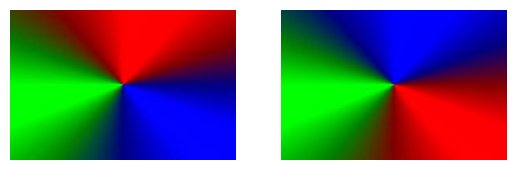

In [17]:
I=np.asarray(bgr_image)
RI=np.zeros_like(I)
B=I[:,:,0]
G=I[:,:,1]
R=I[:,:,2]
RI[:,:,0]=R
RI[:,:,1]=G
RI[:,:,2]=B


plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(I)
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(RI)

**Histogram Equalization**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving linaimage.jpg to linaimage.jpg


236
262144
[4, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224

<BarContainer object of 174 artists>

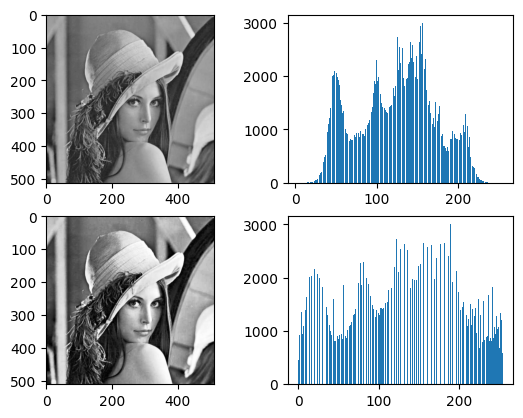

In [ ]:
def frequency(image):
    hmap={}
    sum1=0
    for i in range(len(image)):
        for j in range(len(image[0])):
            pixel=int(image[i][j])
            if pixel in hmap:
                hmap[pixel]+=1
                sum1+=1
            else:
                hmap[pixel]=1
                sum1+=1
    print(len(hmap))
    print(sum1)
    return hmap,sum1
def probability(feq,sum1):
    prob=[]
    for pixel in sorted(feq.keys()):
        prob.append(feq[pixel]/sum1)
    #print(prob)
    return prob
def cdf_pro(prob):
    cdf=[0]*len(prob)
    cdf[0]=prob[0]
    for i in range(1,len(prob)):
        cdf[i]=cdf[i-1]+prob[i]
    #print(cdf)
    return cdf
def round_cdf(cdf):
    result=[]
    for i in range(len(cdf)):
        result.append(round(cdf[i]*255))
    print(result)
    return result


import numpy as np
import cv2
import matplotlib.pyplot as plt
image=cv2.imread(r"linaimage.jpg",cv2.IMREAD_COLOR)
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
if image is None:
    raise ValueError("image not found")
freq,sum1=frequency(image)
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.subplot(2,2,2)
sortedpixel=sorted(freq.keys())
print(sortedpixel)
count=[freq[p] for p in sortedpixel]
plt.bar(sortedpixel,count)
prob=probability(freq,sum1)
cdf=cdf_pro(prob)
rou=round_cdf(cdf)
mapping={}
for i in range(len(sortedpixel)):
    mapping[sortedpixel[i]]=rou[i]
row,col=image.shape
for i in range(row):
    for j in range(col):
        old=int(image[i][j])
        image[i][j]=mapping[old]
plt.subplot(2,2,3)
plt.imshow(image,cmap='gray')
plt.subplot(2,2,4)
freq_eq,_=frequency(image)
sorted_eq=sorted(freq_eq.keys())
count1=[freq_eq[p] for p in sorted_eq]
plt.bar(sorted_eq,count1)

**Image enhancement using frequency domain filtering**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving linaimage.jpg to linaimage.jpg


/tmp/ipython-input-1267571755.py:69: RuntimeWarning: divide by zero encountered in divide
  h = 1 / (1 + (d0 / d)**(2 * n))
/tmp/ipython-input-1267571755.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  C[i,j] = F[i,j] * ((-1)**(i+j))


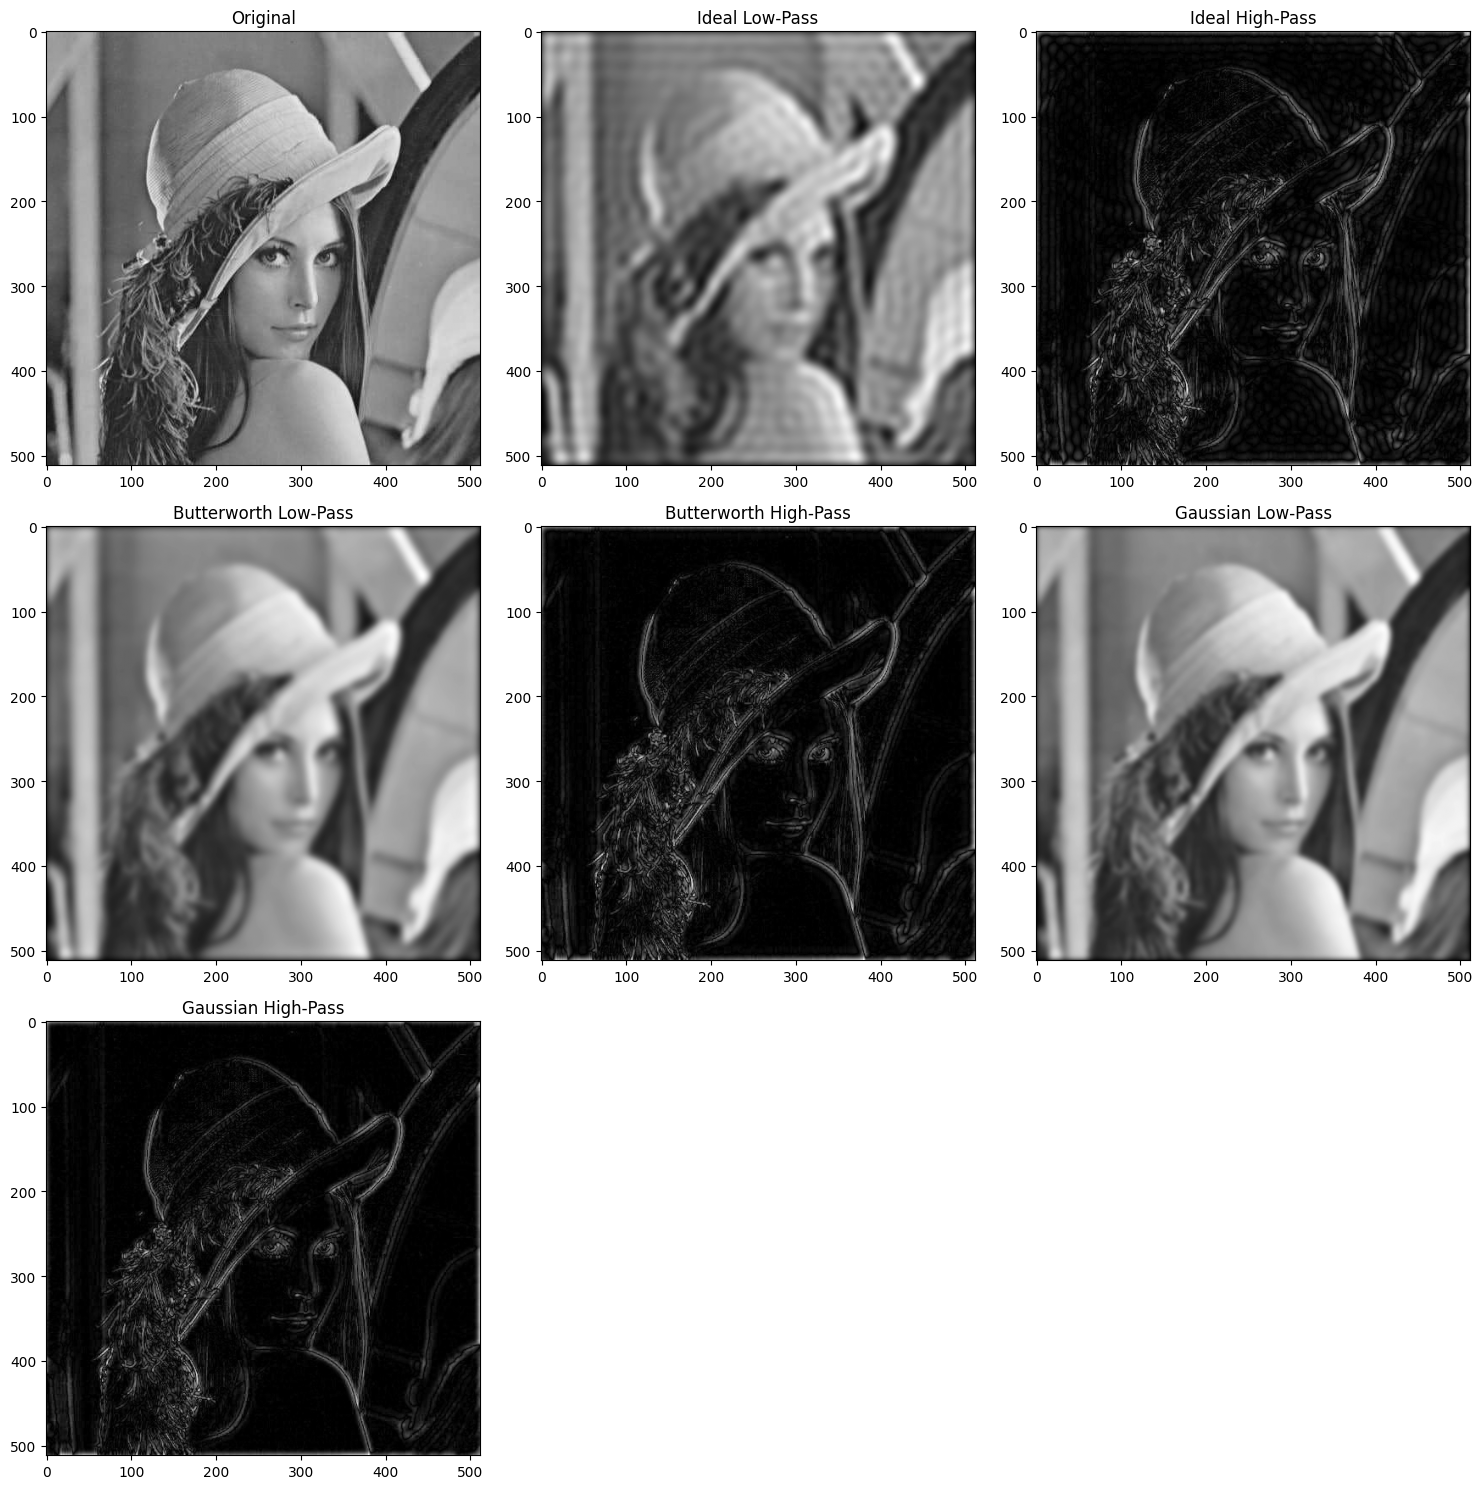

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# ------------------ FUNCTIONS ------------------

def padding(I):
    m,n = I.shape
    M,N = 2*m, 2*n
    F = np.zeros((M,N), dtype="float")
    F[:m, :n] = I
    return F

def centering(F):
    M,N = F.shape
    C = np.zeros((M,N), dtype="float")
    for i in range(M):
        for j in range(N):
            C[i,j] = F[i,j] * ((-1)**(i+j))
    return C

def create_kernal(s, flag):
    k = np.zeros((s,s), dtype='complex')
    for x in range(s):
        for y in range(s):
            k[x,y] = np.exp((-2j * flag * np.pi * x * y) / s)
    return k

def dft(I):
    M,N = I.shape
    k1 = create_kernal(M,1)
    k2 = create_kernal(N,1)
    temp = np.matmul(k1,I)
    F = np.matmul(temp,k2)
    return F

def IDFT(I):
    M,N = I.shape
    k1 = create_kernal(M,-1)
    k2 = create_kernal(N,-1)
    temp = np.matmul(k1,I)
    F = np.matmul(temp,k2)
    return F / (M*N)

def dist(M,N):
    x_cen, y_cen = M//2, N//2
    d = np.zeros((M,N), dtype="float")
    for i in range(M):
        for j in range(N):
            d[i,j] = np.sqrt(((x_cen-i)**2) + ((y_cen-j)**2))
    return d

# ---- Filters ----
def IDLPF(d, d0):
    h = np.zeros_like(d)
    h[d <= d0] = 1
    return h

def IDHPF(d, d0):
    h = np.zeros_like(d)
    h[d >= d0] = 1
    return h

def BLPF(d, d0, n=2):
    h = 1 / (1 + (d / d0)**(2 * n))
    return h

def BHPF(d, d0, n=2):
    h = 1 / (1 + (d0 / d)**(2 * n))
    h[np.isnan(h)] = 0  # handle division by zero
    return h

def GLPF(d, d0):
    h = np.exp(-((d**2) / (2 * (d0**2))))
    return h

def GHPF(d, d0):
    h = 1 - np.exp(-((d**2) / (2 * (d0**2))))
    return h


# ------------------ MAIN ------------------

# Load image
img = cv2.imread(r"linaimage.jpg", cv2.IMREAD_GRAYSCALE)
I = np.array(img)

# Pre-processing
pad = padding(I)
cen = centering(pad)
matdft = dft(cen)

M, N = matdft.shape
d = dist(M, N)
d0 = 50   # cutoff frequency
n = 2     # order for Butterworth

# Apply filters
filters = {
    "Ideal Low-Pass": IDLPF(d, d0),
    "Ideal High-Pass": IDHPF(d, d0),
    "Butterworth Low-Pass": BLPF(d, d0, n),
    "Butterworth High-Pass": BHPF(d, d0, n),
    "Gaussian Low-Pass": GLPF(d, d0),
    "Gaussian High-Pass": GHPF(d, d0)
}

# Display results
plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
plt.title("Original")
plt.imshow(I, cmap='gray')

i = 2
for name, h in filters.items():
    filtered = matdft * h
    idft = IDFT(filtered)
    decen = centering(idft).real
    m, n = I.shape
    out = decen[:m, :n]
    out = cv2.convertScaleAbs(out)

    plt.subplot(3, 3, i)
    plt.title(name)
    plt.imshow(out, cmap='gray')
    i += 1

plt.tight_layout()
plt.show()


**Detect the electric line using Hough Transform**

In [7]:
from google.colab import files
uploaded = files.upload()

Saving electricPole.jpg to electricPole.jpg


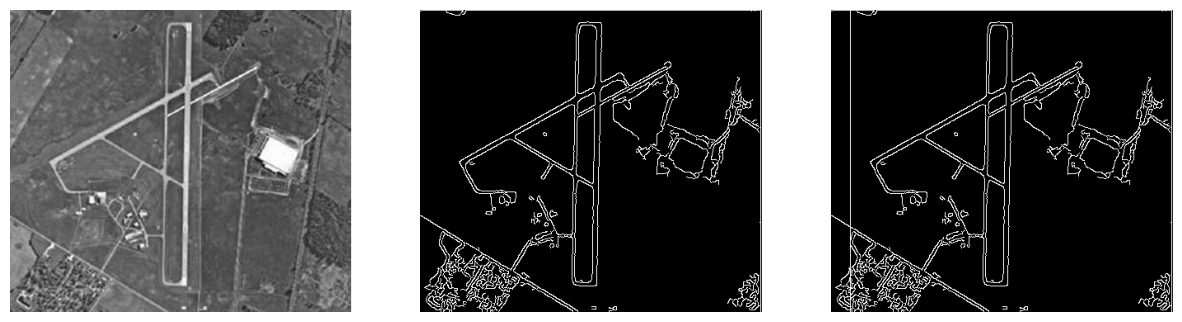

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cv2


def findXY(ED):#finding x and y values
    p=np.where(ED!=0) #tuple of list of xvalues and y values
    #p=([x1,x2,x3],[y1,y2,y3])
    return p


def check(m,c,ED):
    HT=np.copy(ED)
    m1,n1=ED.shape
    #m=p1[0][0]
    maxi=np.max(ED)
    #c=p1[1][0]
    for i in range(m1):
        for j in range(n1):
            if(j==(i*m)+c):
                HT[i,j]=maxi
    return HT

def houghTransform(ED):
    p=findXY(ED)
    m1,n1=ED.shape
    Acc=np.zeros((25,25))
    x1=p[0]
    y1=p[1]
    HT=ED.copy()
    for i in range(len(x1)):
        for m in range(25):
            for c in range(25):
                x,y=x1[i],y1[i]
                if(y==(m*x+c)):
                    Acc[m,c]+=1
    a=np.where(Acc==np.max(Acc))
    m,c=a[0][0],a[1][0]
    HT=check(m,c,ED)
    return HT


# h=houghTransform(ED)
# h[0][0],h[1][0])
I=cv2.imread(r'electricPole.jpg')
I=cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
I=np.asarray(I)
I1=cv2.GaussianBlur(I,(5,5),1)

#Edge detection using canny
ED=cv2.Canny(I1,255,3) #parameters:- image,threshold,dy(I thought it as kernel size(idk))

HT=houghTransform(ED)
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(I,cmap='gray')
plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(ED,cmap='gray')
plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(HT,cmap='gray')


**Noise Removal using Gaussian Filter**

Gaussian Kernal
[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


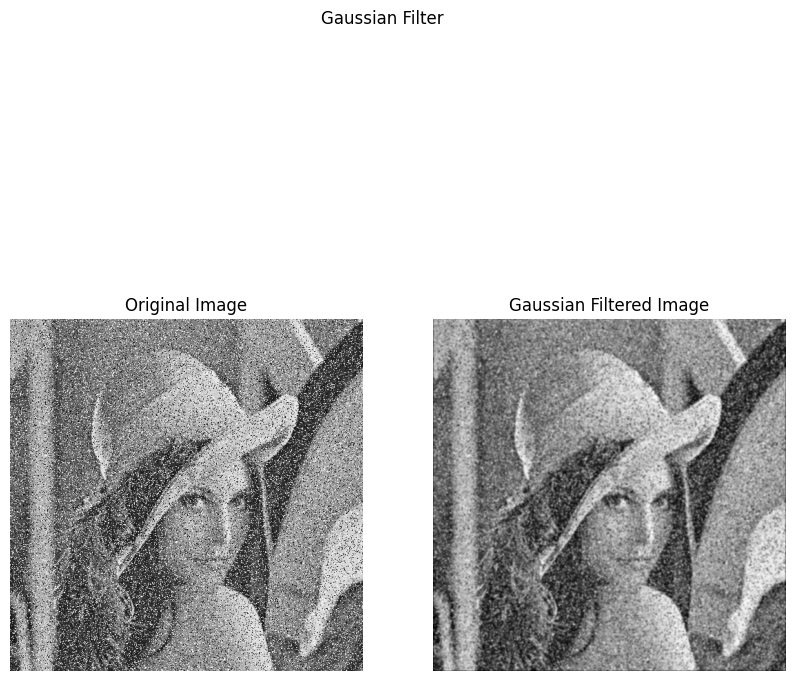

In [10]:
def gaussianformula(s,t,k,sig):
    e=np.exp(-(((s**2)+(t**2))/(2*(sig**2))))
    return (1/(2*(3.14)*(sig**2)))*e #k*e
def normalized(GM,m,n,sum1):
    for i in range(m):
        for j in range(n):
            GM[i,j]=(GM[i,j]/sum1)
    return GM
def gaussianKernel(mat,m,n,k,sig):
    if(m%2==0):
        m=m-1
    if(n%2==0):
        n-=1
    GM=np.zeros((m,n),dtype=float)
    s1=0
    for i in range(m):
        for j in range(n):
            s=float(i-(m//2))
            t=float(j-(n//2))
            w=gaussianformula(s,t,k,sig)
            GM[i,j]=w
            s1+=w
    GMN=normalized(GM,m,n,s1)
    return GMN

def gaussianKernelCreation():
    sig= 1
    ks=int(6*sig) # kernel size
    GK=np.ones((ks,ks),dtype=float)
    k=1#constant for normalization
    GK=gaussianKernel(GK,ks,ks,k,sig)
    return GK

def gaussianFiltering(GK,GI):
    M,N=GI.shape
    m,n=GK.shape
    GIF=np.copy(GI)
    for i in range(M):
        for j in range(N):
            sum1=0.0
            for s in range(-(m//2),(m//2)+1):
                for t in range(-(n//2),(n//2)+1):
                    x=i+s
                    y=j+t
                    if(0<=x<M and 0<=y<N):
                        sum1+=(GI[x,y]*GK[s+(m//2),t+(n//2)])
            GIF[i,j]=sum1
    GIF=GIF.astype('uint8')
    return GIF


I=cv2.imread("linaimage.jpg")
I1=cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
I1=np.array(I1)
m,n=I1.shape
I2=np.random.randint(0,255,(m,n))
pepper=20
salt=220
for i in range(m):
    for j in range(n):
        if I2[i,j]<=pepper:
            I2[i,j]=0
        elif I2[i,j]>=salt:
            I2[i,j]=255
        else:
            I2[i,j]=I1[i,j]
GK=gaussianKernelCreation()
print("Gaussian Kernal")
print(GK)
GI=gaussianFiltering(GK,I2)
plt.figure(figsize=(10,10))
plt.suptitle("Gaussian Filter ")
plt.subplot(1,2,1)
plt.axis('off')
plt.title('Original Image')
plt.imshow(I2,cmap='gray')
plt.subplot(1,2,2)
plt.axis('off')
plt.title('Gaussian Filtered Image')
plt.imshow(GI,cmap='gray')




**Image Restoration Techniques**

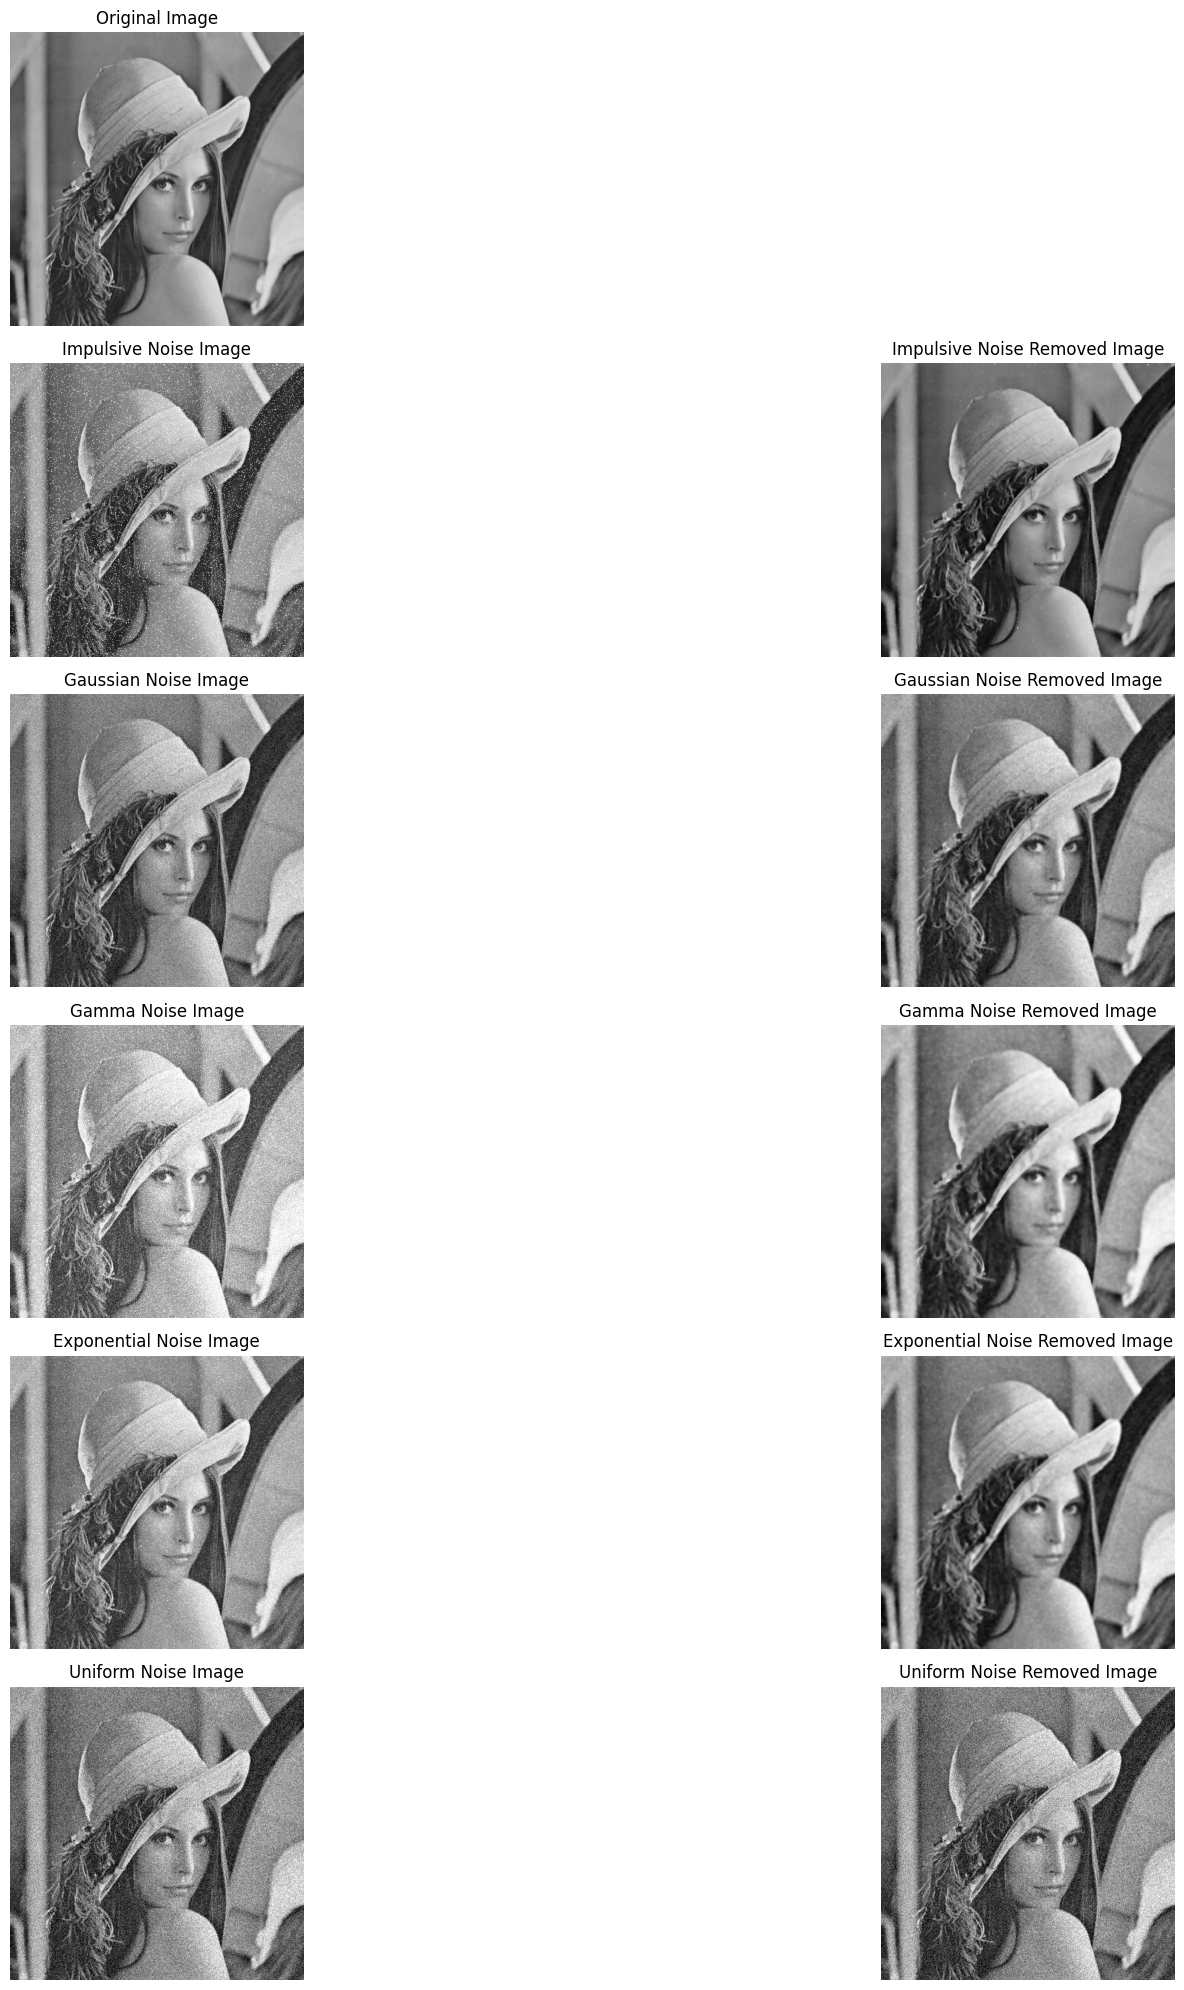

In [11]:
#import statements
import numpy as np
import cv2
import matplotlib.pyplot as plt

#impulsive noise creation
def impulsive_noise(I, a, b):
    m, n = I.shape
    N = np.random.randint(0, 255, (m, n), dtype=np.uint8)
    for i in range(m):
        for j in range(n):
            if a <= N[i][j] <= b:
                N[i][j] = 0
    return N


#gaussian noise creation
def gaussian_noise(I, mean=0, sigma=20):
    m, n = I.shape
    N = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            u1 = np.random.rand()
            u2 = np.random.rand()
            z = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)  # standard normal
            N[i][j] = mean + sigma * z
    return N.astype(np.int32)


def gamma_noise(I, k=2.0, theta=20.0):
    m, n = I.shape
    N = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            prod = 1.0
            for _ in range(int(k)):
                prod *= np.random.rand()
            N[i][j] = -theta * np.log(prod)
    return N.astype(np.int32)


def exponential_noise(I, lam=1/20.0):
    m, n = I.shape
    N = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            u = np.random.rand()
            N[i][j] = -np.log(1 - u) / lam
    return N.astype(np.int32)


def uniform_noise(I, low=-50, high=50):
    m, n = I.shape
    N = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            u = np.random.rand()
            N[i][j] = low + (high - low) * u
    return N.astype(np.int32)
I=cv2.imread(r"linaimage.jpg", cv2.IMREAD_GRAYSCALE)
I=np.asarray(I)

noise = impulsive_noise(I, 40, 240)
INI = cv2.add(I, noise)  # safer than I + noise (handles overflow)


# Apply Gaussian noise
noise = gaussian_noise(I)
GauNI = I.astype(np.int32) + noise
GauNI = np.clip(GauNI, 0, 255).astype(np.uint8)  # keep pixel range valid

# Apply gamma noise
noise = gamma_noise(I)
GamNI = I.astype(np.int32) + noise
GamNI = np.clip(GamNI, 0, 255).astype(np.uint8)


# Apply exponential noise
noise = exponential_noise(I)
ENI = I.astype(np.int32) + noise
ENI = np.clip(ENI, 0, 255).astype(np.uint8)


# Apply uniform noise
noise = uniform_noise(I)
UNI = I.astype(np.int32) + noise
UNI = np.clip(UNI, 0, 255).astype(np.uint8)

resINI = cv2.medianBlur(INI, 3)

#Gaussian Noise → Gaussian Blur or Bilateral Filter
resGauNI = cv2.GaussianBlur(GauNI, (5,5), 0)

#Gamma Noise → Bilateral Filter (preserves edges better)
resGamNI = cv2.bilateralFilter(GamNI, 9, 75, 75)

#Exponential Noise → Averaging (Mean) Filter
resENI = cv2.blur(ENI, (5,5))

# Uniform Noise → Non-local Means Denoising
resUNI = cv2.fastNlMeansDenoising(UNI, None, h=10, templateWindowSize=7, searchWindowSize=21)

img=[INI,GauNI,GamNI,ENI,UNI]
title=['Impulsive Noise Image','Gaussian Noise Image','Gamma Noise Image','Exponential Noise Image','Uniform Noise Image']
res_img=[resINI,resGauNI,resGamNI,resENI,resUNI]
res_title=['Impulsive Noise Removed Image','Gaussian Noise Removed Image','Gamma Noise Removed Image','Exponential Noise Removed Image','Uniform Noise Removed Image']
plt.figure(figsize=(20,20))
j=0
plt.subplot(6,2,1)
plt.title("Original Image")
plt.imshow(I,cmap='gray')
plt.axis('off')
for i in range(3,13,2):
    plt.subplot(6,2,i)
    plt.title(title[j])
    plt.imshow(img[j],cmap='gray')
    plt.axis('off')
    plt.subplot(6,2,i+1)
    plt.title(res_title[j])
    plt.imshow(res_img[j],cmap='gray')
    plt.axis('off')
    j+=1
plt.tight_layout()
plt.show()


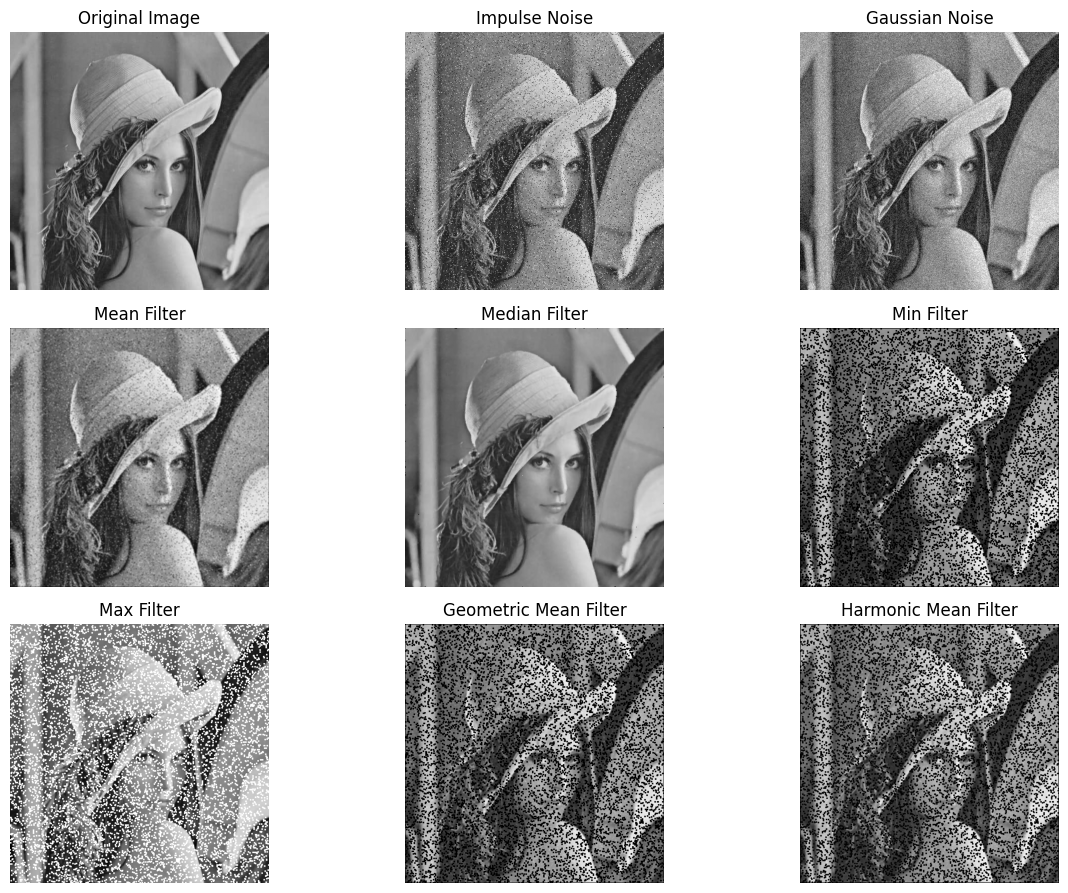

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image

# ----------------- Noise and Filters -----------------

def impulse_noise(I, a, b):
    """Adds salt and pepper (impulse) noise"""
    m, n = I.shape
    noisy = I.copy()
    for i in range(m):
        for j in range(n):
            r = np.random.randint(0, 255)
            if r < a:
                noisy[i, j] = 0      # pepper
            elif r > b:
                noisy[i, j] = 255    # salt
    return noisy


def mean_filter(I):
    m, n = I.shape
    a = 3
    M = np.zeros((m+a-1, n+a-1), dtype=int)
    M[a//2:m+a//2, a//2:n+a//2] = I
    M1 = M.copy()
    for i in range(1, m+a-2):
        for j in range(1, n+a-2):
            li = []
            for p in range(i-1, i+2):
                for q in range(j-1, j+2):
                    li.append(M[p, q])
            x = sum(li) / len(li)
            M1[i, j] = x
    return M1[a//2:m+a//2, a//2:n+a//2]


def median_filter(I):
    m, n = I.shape
    a = 3
    M = np.zeros((m+a-1, n+a-1), dtype=int)
    M[a//2:m+a//2, a//2:n+a//2] = I
    M1 = M.copy()
    for i in range(1, m+a-2):
        for j in range(1, n+a-2):
            li = []
            for p in range(i-1, i+2):
                for q in range(j-1, j+2):
                    li.append(M[p, q])
            li.sort()
            ind = len(li)//2
            M1[i, j] = li[ind]
    return M1[a//2:m+a//2, a//2:n+a//2]


def min_filter(I):
    m, n = I.shape
    a = 3
    M = np.zeros((m+a-1, n+a-1), dtype=int)
    M[a//2:m+a//2, a//2:n+a//2] = I
    M1 = M.copy()
    for i in range(1, m+a-2):
        for j in range(1, n+a-2):
            li = []
            for p in range(i-1, i+2):
                for q in range(j-1, j+2):
                    li.append(M[p, q])
            val = min(li)
            M1[i, j] = val
    return M1[a//2:m+a//2, a//2:n+a//2]


def max_filter(I):
    m, n = I.shape
    a = 3
    M = np.zeros((m+a-1, n+a-1), dtype=int)
    M[a//2:m+a//2, a//2:n+a//2] = I
    M1 = M.copy()
    for i in range(1, m+a-2):
        for j in range(1, n+a-2):
            li = []
            for p in range(i-1, i+2):
                for q in range(j-1, j+2):
                    li.append(M[p, q])
            val = max(li)
            M1[i, j] = val
    return M1[a//2:m+a//2, a//2:n+a//2]


def geometric_mean(I):
    m, n = I.shape
    a = 3
    M = np.ones((m+a-1, n+a-1), dtype=float)
    M[a//2:m+a//2, a//2:n+a//2] = I
    M1 = M.copy()
    w = 1 / (a*a)
    for i in range(1, m+a-2):
        for j in range(1, n+a-2):
            li = []
            for p in range(i-1, i+2):
                for q in range(j-1, j+2):
                    li.append(M[p, q])
            pro = np.prod(li)
            M1[i, j] = math.pow(pro, w)
    return M1[a//2:m+a//2, a//2:n+a//2]


def harmonic_mean(I):
    m, n = I.shape
    a = 3
    M = np.ones((m+a-1, n+a-1), dtype=float)
    M[a//2:m+a//2, a//2:n+a//2] = I
    M1 = M.copy()
    w = (a*a)
    for i in range(1, m+a-2):
        for j in range(1, n+a-2):
            li = []
            for p in range(i-1, i+2):
                for q in range(j-1, j+2):
                    li.append(M[p, q] if M[p, q] != 0 else 1)
            s = sum([1/x for x in li])
            M1[i, j] = w / s
    return M1[a//2:m+a//2, a//2:n+a//2]


def gaussian_filter(I):
    """Add Gaussian noise"""
    noise = np.random.normal(0, 25, I.shape)
    noisy_img = I + noise
    return np.clip(noisy_img, 0, 255).astype(np.uint8)


# ----------------- MAIN -----------------

img = Image.open("linaimage.jpg").convert('L')
I = np.array(img)

# Add noises
noisy_impulse = impulse_noise(I, 10, 245)
noisy_gaussian = gaussian_filter(I)

# Apply filters
mean_restoration = mean_filter(noisy_impulse)
median_restoration = median_filter(noisy_impulse)
min_restoration = min_filter(noisy_impulse)
max_restoration = max_filter(noisy_impulse)
geometric_restoration = geometric_mean(noisy_impulse)
harmonic_restoration = harmonic_mean(noisy_impulse)

# ----------------- DISPLAY -----------------
plt.figure(figsize=(12, 12))

plt.subplot(4, 3, 1)
plt.title("Original Image")
plt.axis("off")
plt.imshow(I, cmap='gray')

plt.subplot(4, 3, 2)
plt.title("Impulse Noise")
plt.axis("off")
plt.imshow(noisy_impulse, cmap='gray')

plt.subplot(4, 3, 3)
plt.title("Gaussian Noise")
plt.axis("off")
plt.imshow(noisy_gaussian, cmap='gray')

plt.subplot(4, 3, 4)
plt.title("Mean Filter")
plt.axis("off")
plt.imshow(mean_restoration, cmap='gray')

plt.subplot(4, 3, 5)
plt.title("Median Filter")
plt.axis("off")
plt.imshow(median_restoration, cmap='gray')

plt.subplot(4, 3, 6)
plt.title("Min Filter")
plt.axis("off")
plt.imshow(min_restoration, cmap='gray')

plt.subplot(4, 3, 7)
plt.title("Max Filter")
plt.axis("off")
plt.imshow(max_restoration, cmap='gray')

plt.subplot(4, 3, 8)
plt.title("Geometric Mean Filter")
plt.axis("off")
plt.imshow(geometric_restoration, cmap='gray')

plt.subplot(4, 3, 9)
plt.title("Harmonic Mean Filter")
plt.axis("off")
plt.imshow(harmonic_restoration, cmap='gray')

plt.tight_layout()
plt.show()


**Edge detection using canny, sobel and prewitt filters**



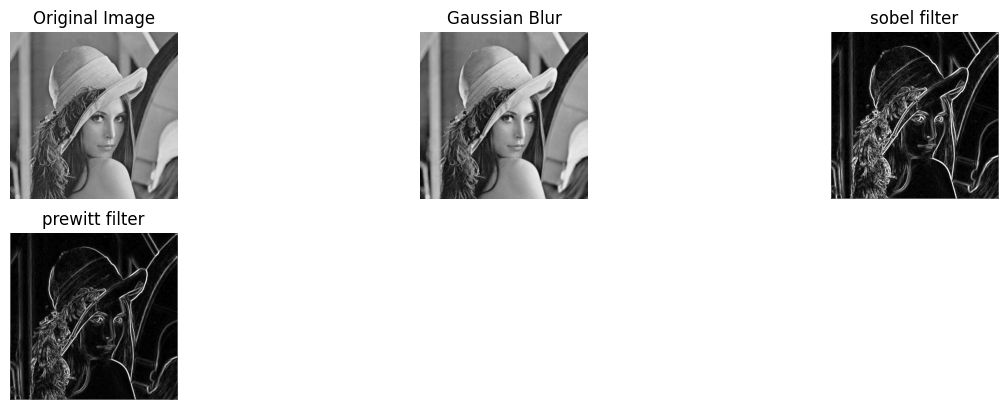

In [9]:


def sobelfil(I):
    m,n=I.shape[0],I.shape[1]
    k1=[[-1,-2,-1],[0,0,0],[1,2,1]]
    k2=[[-1,0,1],[-2,0,2],[-1,0,1]]
    a=3
    L=np.zeros((m+a-1,n+a-1),dtype=int)
    L[a//2:m+a//2,a//2:n+a//2]=I
    L1=np.copy(L)
    for i in range(1,m+a-2):
        for j in range(1,n+a-2):
            l1,l2=[],[]
            for p in range(0,3):
                for q in range(0,3):
                    x=i+p-1
                    y=j+q-1

                    l1.append(k1[p][q]*L[x,y])
                    l2.append(k2[p][q]*L[x,y])
            gx,gy=sum(l1),sum(l2)
            L1[i,j]=math.sqrt(gx**2+gy**2)
    L1=np.clip(L1,0,255).astype(np.uint8)
    return L1

def prewittfil(I):
    m,n=I.shape[0],I.shape[1]
    k1=[[-1,-1,-1],[0,0,0],[1,1,1]]
    k2=[[-1,0,1],[-1,0,1],[-1,0,1]]
    a=3
    L=np.zeros((m+a-1,n+a-1),dtype=int)
    L[a//2:m+a//2,a//2:n+a//2]=I
    L1=np.copy(L)
    for i in range(1,m+a-2):
        for j in range(1,n+a-2):
            l1,l2=[],[]
            for p in range(-1,2):
                for q in range(-1,2):
                    x=i+p
                    y=j+q

                    l1.append(k1[p+1][q+1]*L[x,y])
                    l2.append(k2[p+1][q+1]*L[x,y])
            gx,gy=sum(l1),sum(l2)
            L1[i,j]=math.sqrt(gx**2+gy**2)
    L1=np.clip(L1,0,255).astype(np.uint8)
    return L1

import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from PIL import Image
img=cv2.imread(r"linaimage.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
I=np.asarray(img)
blurred=cv2.GaussianBlur(I,(3,3),0)
blur=np.array(blurred)
sobal=sobelfil(blur)
prewitt=prewittfil(blur)
plt.figure(figsize=(15,10))
plt.subplot(4,3,1)

plt.axis("off")
plt.title("Original Image")
plt.imshow(img,cmap="gray")
#m,n=I.shape
plt.subplot(4,3,2)
plt.axis("off")
plt.title("Gaussian Blur")
plt.imshow(blurred,cmap="gray")

plt.subplot(4,3,3)
plt.axis("off")
plt.title("sobel filter")
plt.imshow(sobal,cmap="gray")

plt.subplot(4,3,4)
plt.axis("off")
plt.title("prewitt filter")
plt.imshow(prewitt,cmap="gray")
#m,n=I.shape
#for x in range(m):


